In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensure charts are displayed in notebook without command
%matplotlib inline

In [3]:
# Set path 
path = r'C:\Users\jecka\2023-12-05 Achievement 6'

In [4]:
# import anime dataset
anime = pd.read_csv(r'C:\Users\jecka\2023-12-05 Achievement 6\02 Data\Prepared Data\Anime Cleaned.csv', index_col = False)

C:\Users\jecka\AppData\Local\Temp\ipykernel_26852\807037820.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  anime = pd.read_csv(r'C:\Users\jecka\2023-12-05 Achievement 6\02 Data\Prepared Data\Anime Cleaned.csv', index_col = False)


# Consistancy Check

In [5]:
# Checking data with numerical values
anime.describe()

,anime_id,score,scored_by,episodes,members,favorites,episode_duration,total_duration,start_year,Action,...,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
count,24983.000000,16050.000000,2.498300e+04,24436.000000,2.498300e+04,24983.000000,24387.000000,24162.000000,24116.000000,24983.000000,...,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,29870.740704,6.418470,1.915505e+04,14.877599,3.758683e+04,437.182284,22.248290,227.700708,2007.689667,0.189889,...,0.005964,0.059480,0.021415,0.033863,0.082656,0.124365,0.068086,0.030661,0.059601,0.009887
std,18020.920840,0.899305,9.487068e+04,48.449474,1.583696e+05,4390.343444,24.399235,627.349919,14.723966,0.392221,...,0.076998,0.236526,0.144765,0.180880,0.275367,0.330004,0.251899,0.172401,0.236750,0.098941
min,1.000000,1.850000,0.000000e+00,1.000000,0.000000e+00,0.000000,0.050000,0.050000,1917.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10543.000000,5.800000,5.100000e+01,1.000000,2.200000e+02,0.000000,4.800000,11.000000,2002.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34692.000000,6.420000,3.070000e+02,2.000000,1.085000e+03,1.000000,17.000000,55.000000,2012.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45346.000000,7.070000,3.433000e+03,13.000000,9.501000e+03,18.000000,25.000000,284.000000,2018.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,56202.000000,9.100000,2.685033e+06,3057.000000,3.779820e+06,219036.000000,168.020000,36775.000000,2025.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
anime.dtypes

anime_id            float64
title                object
country_origin       object
type                 object
score               float64
scored_by           float64
status               object
episodes            float64
source               object
members             float64
favorites           float64
episode_duration    float64
total_duration      float64
rating               object
start_year          float64
start_season         object
genres               object
demographics         object
dtype: object

In [6]:
# change data types of anime_id and start_year
anime['anime_id'] = anime['anime_id'].astype('object')
anime['start_year'] = anime['start_year'].astype('object')

In [7]:
anime.dtypes

anime_id             object
title                object
country_origin       object
story_origin         object
type                 object
score               float64
scored_by             int64
status               object
episodes            float64
source               object
members               int64
favorites             int64
episode_duration    float64
total_duration      float64
rating               object
start_year           object
start_season         object
demographics         object
Action                int64
Adventure             int64
Avant Garde           int64
Award Winning         int64
Boys Love             int64
Comedy                int64
Drama                 int64
Ecchi                 int64
Erotica               int64
Fantasy               int64
Girls Love            int64
Gourmet               int64
Hentai                int64
Horror                int64
Mystery               int64
Romance               int64
Sci-Fi                int64
Slice of Life       

In [5]:
# Converting episode_duration and total_duration into more compact values
anime['episode_duration'] = (pd.to_timedelta(anime['episode_duration']).dt.total_seconds() / 60).round(2)
anime['total_duration'] = (pd.to_timedelta(anime['total_duration']).dt.total_seconds() / 60).round(2)

In [10]:
anime

,anime_id,title,country_origin,type,score,scored_by,status,episodes,source,members,favorites,episode_duration,total_duration,rating,start_year,start_season,genres,demographics
0,1.0,Cowboy Bebop,Japan,tv,8.75,923377.0,finished_airing,26.0,original,1788584.0,79192.0,24.00,624.00,R,1998.0,spring,"['Action', 'Award Winning', 'Sci-Fi']",NaN
1,5.0,Cowboy Bebop: Tengoku no Tobira,Japan,movie,8.38,207777.0,finished_airing,1.0,original,363968.0,1477.0,115.18,115.18,R,2001.0,summer,"['Action', 'Sci-Fi']",NaN
2,6.0,Trigun,Japan,tv,8.22,359862.0,finished_airing,26.0,manga,733966.0,15265.0,24.67,641.33,PG_13,1998.0,spring,"['Action', 'Adventure', 'Sci-Fi']",Shounen
3,7.0,Witch Hunter Robin,Japan,tv,7.25,43038.0,finished_airing,26.0,original,112755.0,618.0,25.00,650.00,PG_13,2002.0,summer,"['Action', 'Drama', 'Mystery', 'Supernatural']",NaN
4,8.0,Bouken Ou Beet,Japan,tv,6.94,6445.0,finished_airing,52.0,manga,15093.0,14.0,23.00,1196.00,PG,2004.0,fall,"['Adventure', 'Fantasy', 'Supernatural']",Shounen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24980,56182.0,Urahara,Japan,NaN,NaN,0.0,not_yet_aired,NaN,original,223.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,56189.0,Grendizer U,Japan,tv,NaN,1.0,not_yet_aired,NaN,manga,561.0,4.0,NaN,NaN,NaN,2024.0,NaN,"['Action', 'Sci-Fi']",NaN
24982,56196.0,Boku no Hero Academia: The Movie,Japan,movie,NaN,0.0,not_yet_aired,NaN,manga,10409.0,34.0,NaN,NaN,PG_13,NaN,NaN,['Action'],Shounen
24983,56202.0,Ame to Kusari,Japan,music,NaN,0.0,finished_airing,1.0,original,0.0,0.0,NaN,NaN,PG_13,2015.0,summer,['Drama'],NaN


Exporting this now since the rest of this is going to be analyzing

In [14]:
# Export to csv
anime.to_csv(os.path.join(path,'02 Data','Prepared Data', 'Anime Cleaned.csv'), index=False)

# Creating subsets to analyze further

In [8]:
# Dropping the entries that have not yet aired
anime['status'] = anime['status'].astype(str)  # Ensure 'status' column is treated as a string

df_sub = anime[anime['status'] != 'not_yet_aired'].reset_index(drop=True)

In [9]:
df_sub

,anime_id,title,country_origin,story_origin,type,score,scored_by,status,episodes,source,...,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,1,Cowboy Bebop,Japan,Japan,tv,8.75,923377,finished_airing,26.0,original,...,0,0,0,0,0,1,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,Japan,Japan,movie,8.38,207777,finished_airing,1.0,original,...,0,0,0,0,0,1,0,0,0,0
2,6,Trigun,Japan,Japan,tv,8.22,359862,finished_airing,26.0,manga,...,0,0,0,0,0,1,0,0,0,0
3,7,Witch Hunter Robin,Japan,Japan,tv,7.25,43038,finished_airing,26.0,original,...,0,0,0,1,0,0,0,0,1,0
4,8,Bouken Ou Beet,Japan,Japan,tv,6.94,6445,finished_airing,52.0,manga,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24557,56168,Yotsukado no Melody,Japan,Japan,music,NaN,1,finished_airing,1.0,original,...,0,0,0,0,0,0,0,0,0,0
24558,56169,Tettou,Japan,Japan,music,NaN,6,finished_airing,1.0,original,...,0,0,0,0,0,0,0,0,0,0
24559,56170,Kokyuu no Omamori,Japan,Japan,music,NaN,12,finished_airing,1.0,original,...,0,0,0,0,0,0,0,0,0,0
24560,56172,"Temple x Kanojo, Okarishimasu",Japan,Japan,ona,NaN,4,currently_airing,NaN,manga,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#creating sub df
df_sub2 = df_sub[['score', 'scored_by', 'episodes', 'members', 'start_year', 'episode_duration', 'total_duration', 'favorites']]

In [11]:
df_sub2

,score,scored_by,episodes,members,start_year,episode_duration,total_duration,favorites
0,8.75,923377,26.0,1788584,1998.0,24.00,624.00,79192
1,8.38,207777,1.0,363968,2001.0,115.18,115.18,1477
2,8.22,359862,26.0,733966,1998.0,24.67,641.33,15265
3,7.25,43038,26.0,112755,2002.0,25.00,650.00,618
4,6.94,6445,52.0,15093,2004.0,23.00,1196.00,14
...,...,...,...,...,...,...,...,...
24557,NaN,1,1.0,23,2014.0,NaN,NaN,0
24558,NaN,6,1.0,27,2019.0,2.42,2.42,0
24559,NaN,12,1.0,31,2021.0,2.42,2.42,0
24560,NaN,4,NaN,77,2023.0,2.57,2.57,0


# Heat Maps

In [12]:
# Checking correlation 
df_sub2.corr()

,score,scored_by,episodes,members,start_year,episode_duration,total_duration,favorites
score,1.000000,0.349905,0.082465,0.389243,0.233091,0.294795,0.171812,0.236158
scored_by,0.349905,1.000000,0.026915,0.989100,0.075648,0.075296,0.088889,0.784990
episodes,0.082465,0.026915,1.000000,0.026806,-0.025389,-0.085449,0.788102,0.044794
members,0.389243,0.989100,0.026806,1.000000,0.089549,0.081015,0.094372,0.772778
start_year,0.233091,0.075648,-0.025389,0.089549,1.000000,-0.134832,-0.072676,0.029967
episode_duration,0.294795,0.075296,-0.085449,0.081015,-0.134832,1.000000,0.002581,0.030383
total_duration,0.171812,0.088889,0.788102,0.094372,-0.072676,0.002581,1.000000,0.102196
favorites,0.236158,0.784990,0.044794,0.772778,0.029967,0.030383,0.102196,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

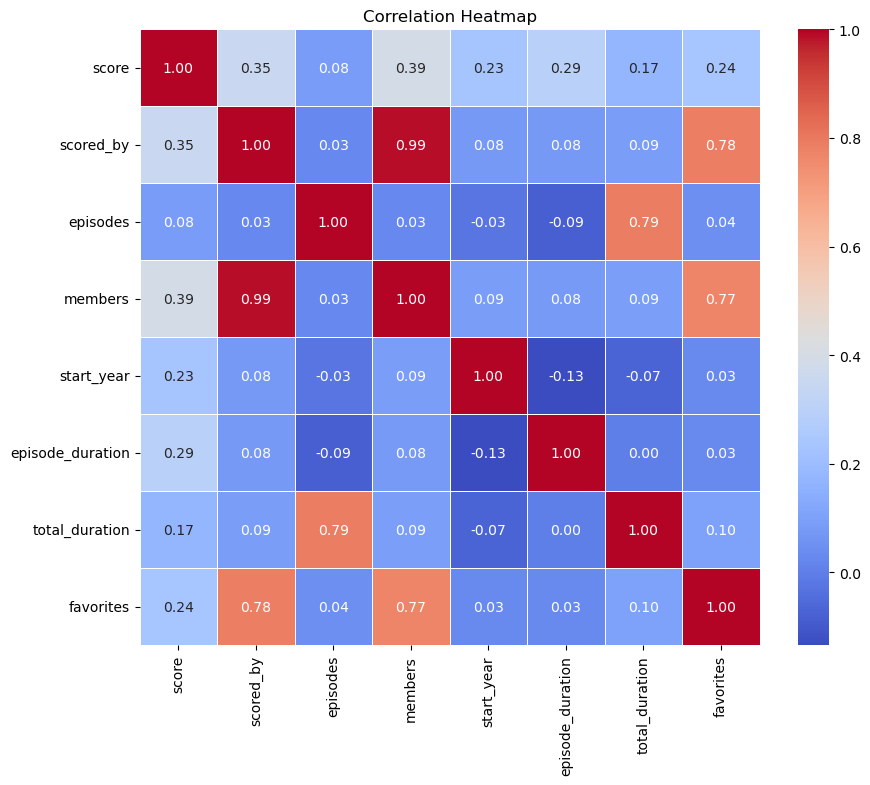

In [13]:
corr_matrix = df_sub2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')

In [14]:
# Wondering howw this would look of I dropped the nulls for score
df_sub3 = df_sub2.copy() 
df_sub3.dropna(subset=['score'], inplace=True)

In [15]:
df_sub3.tail()

,score,scored_by,episodes,members,start_year,episode_duration,total_duration,favorites
24417,5.74,218,1.0,464,2023.0,3.63,3.63,0
24422,5.86,1767,1.0,5601,2023.0,NaN,NaN,8
24500,6.44,143,1.0,288,2023.0,1.98,1.98,4
24526,6.73,139,1.0,260,2023.0,NaN,NaN,1
24545,6.81,141,1.0,690,2023.0,2.42,2.42,14


In [16]:
df_sub3.corr()

,score,scored_by,episodes,members,start_year,episode_duration,total_duration,favorites
score,1.000000,0.349905,0.082465,0.389243,0.233091,0.294795,0.171812,0.236158
scored_by,0.349905,1.000000,0.053712,0.989220,0.098667,0.065211,0.109207,0.784951
episodes,0.082465,0.053712,1.000000,0.057045,-0.077004,-0.050658,0.830202,0.066055
members,0.389243,0.989220,0.057045,1.000000,0.117009,0.068195,0.116906,0.773820
start_year,0.233091,0.098667,-0.077004,0.117009,1.000000,-0.136204,-0.118795,0.038936
episode_duration,0.294795,0.065211,-0.050658,0.068195,-0.136204,1.000000,0.012346,0.023888
total_duration,0.171812,0.109207,0.830202,0.116906,-0.118795,0.012346,1.000000,0.121427
favorites,0.236158,0.784951,0.066055,0.773820,0.038936,0.023888,0.121427,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

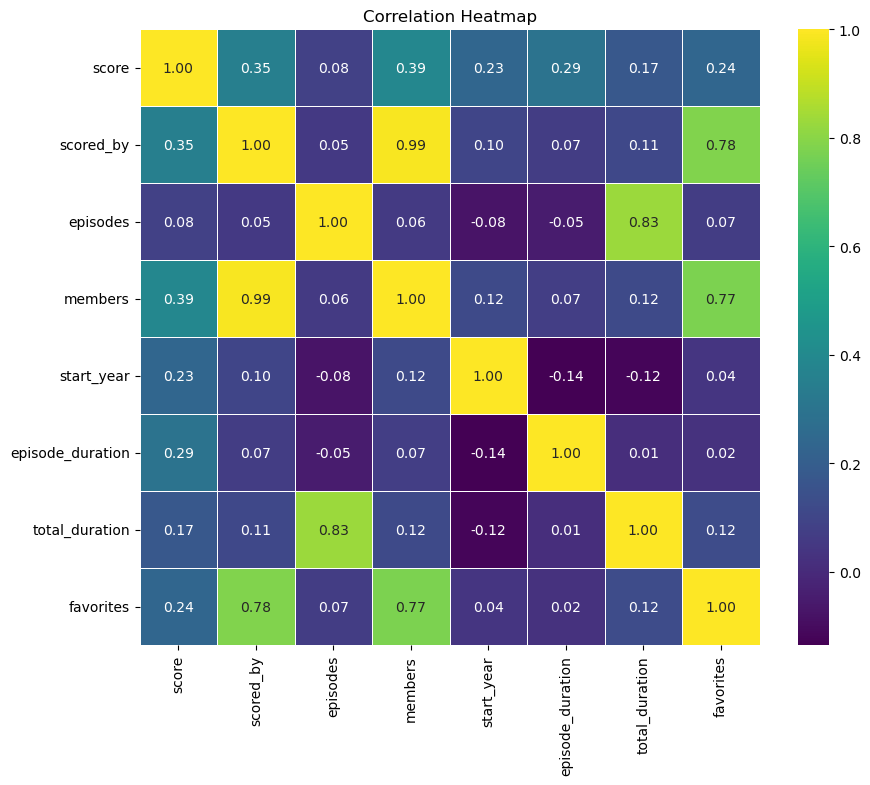

In [17]:
corr_matrix = df_sub3.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')

# Plot Lines

In [18]:
anime.columns

Index(['anime_id', 'title', 'country_origin', 'story_origin', 'type', 'score',
       'scored_by', 'status', 'episodes', 'source', 'members', 'favorites',
       'episode_duration', 'total_duration', 'rating', 'start_year',
       'start_season', 'demographics', 'Action', 'Adventure', 'Avant Garde',
       'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Ecchi', 'Erotica',
       'Fantasy', 'Girls Love', 'Gourmet', 'Hentai', 'Horror', 'Mystery',
       'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural',
       'Suspense'],
      dtype='object')

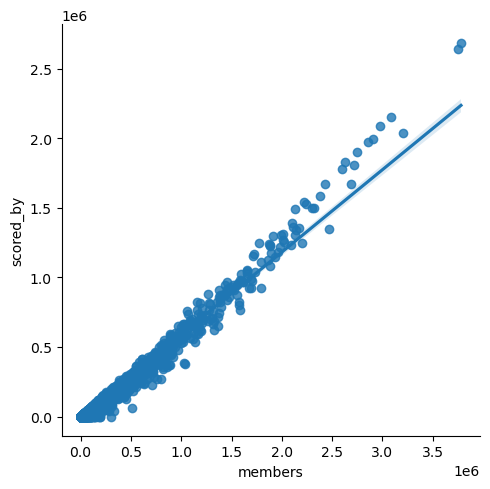

In [19]:
sns.lmplot(x = 'members', y = 'scored_by', data = anime)

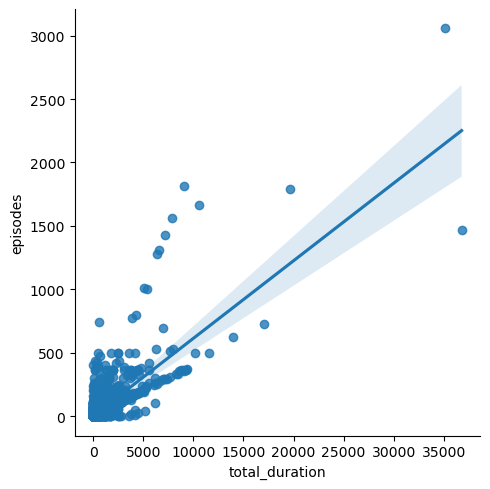

In [27]:
sns.lmplot(x = 'total_duration', y = 'episodes', data = anime)

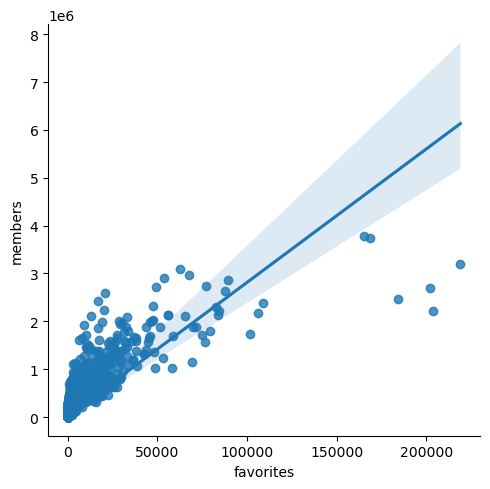

In [28]:
sns.lmplot(x = 'favorites', y = 'members', data = anime)

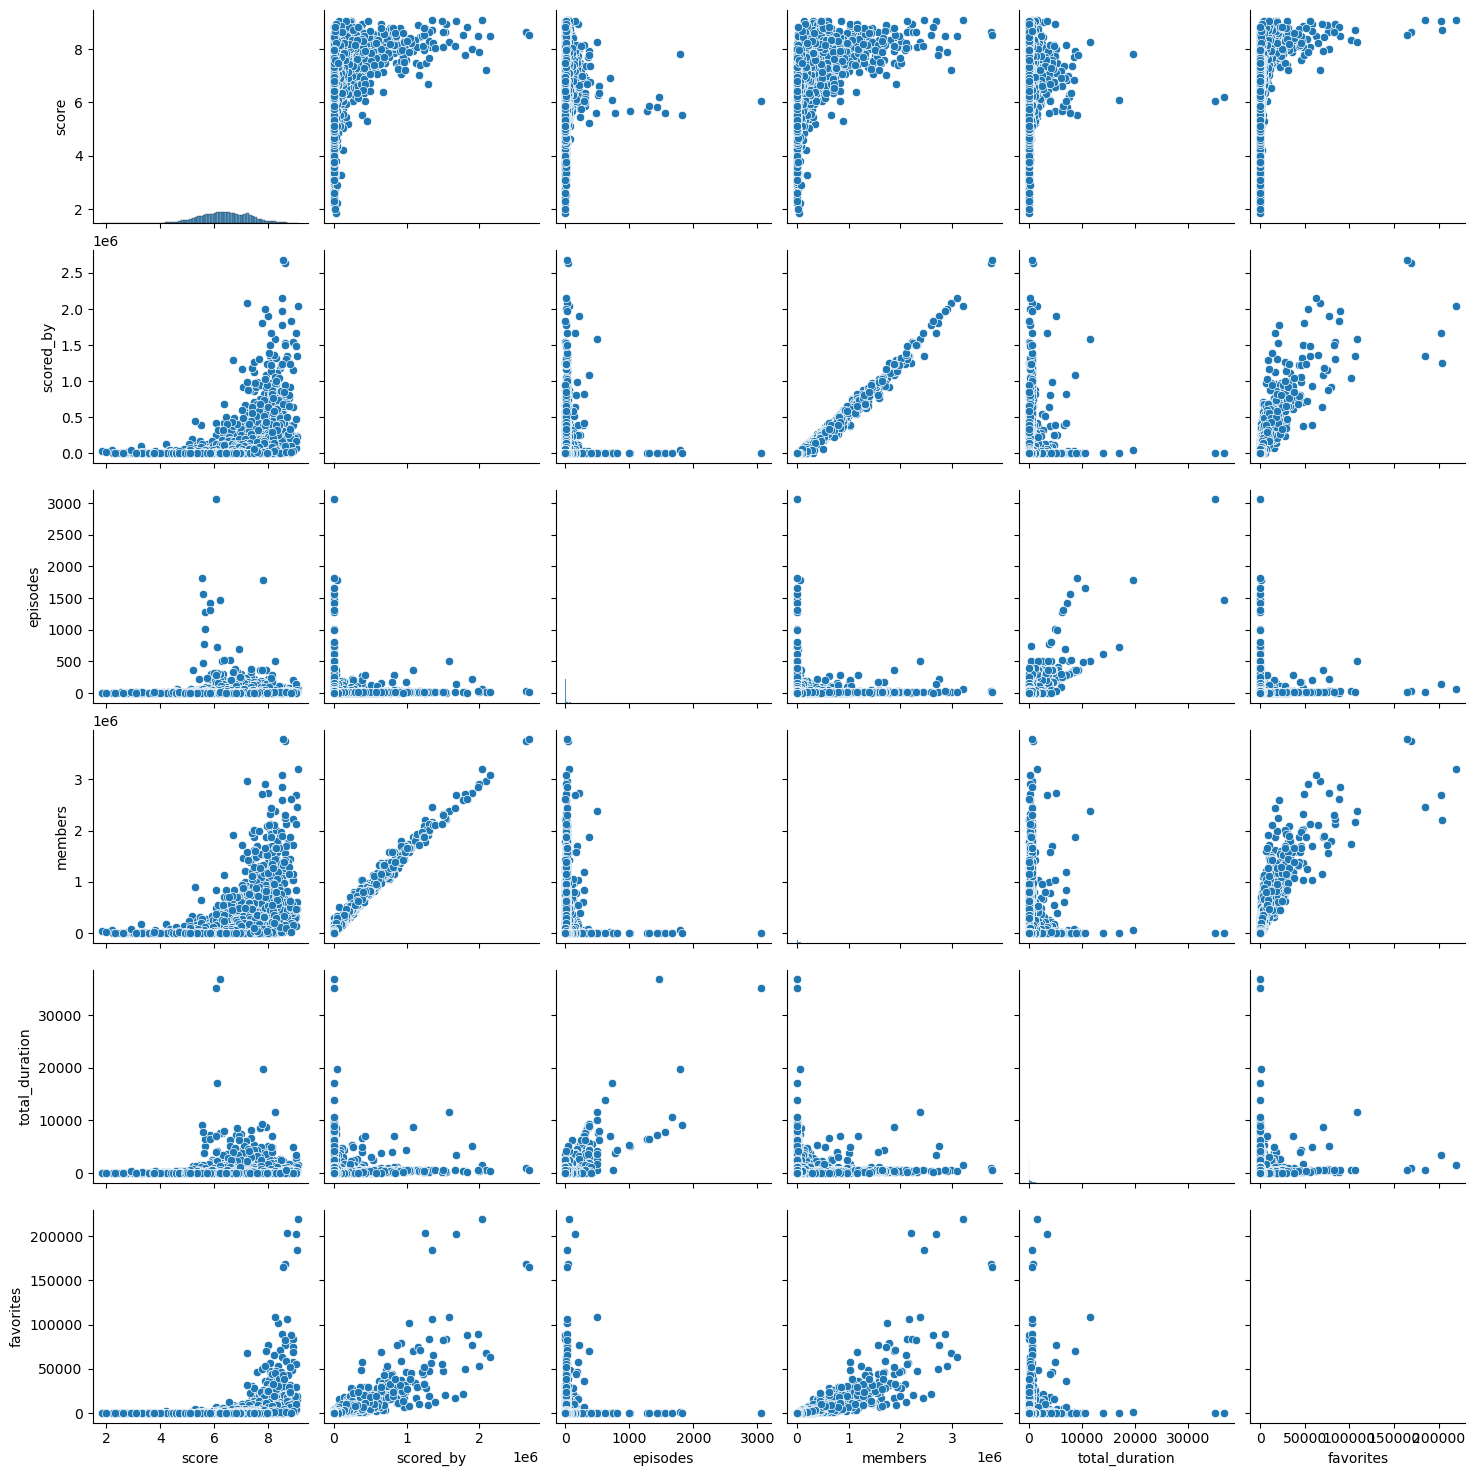

In [27]:
#pair plot
columns_of_interest = ['score', 'scored_by', 'episodes', 'members', 'total_duration', 'favorites']

sns.pairplot(anime[columns_of_interest])
plt.show()

<Axes: xlabel='start_year', ylabel='Count'>

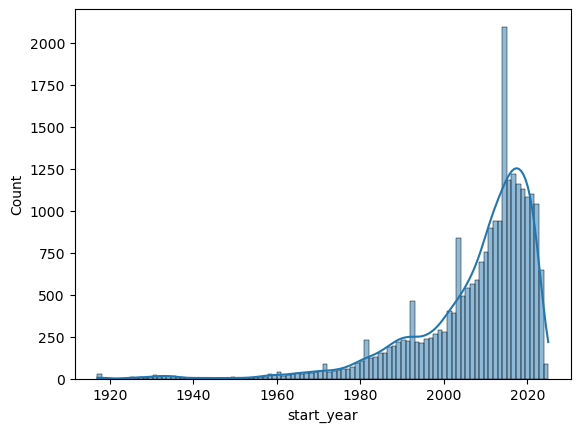

In [29]:
sns.histplot(anime['start_year'],kde = True)

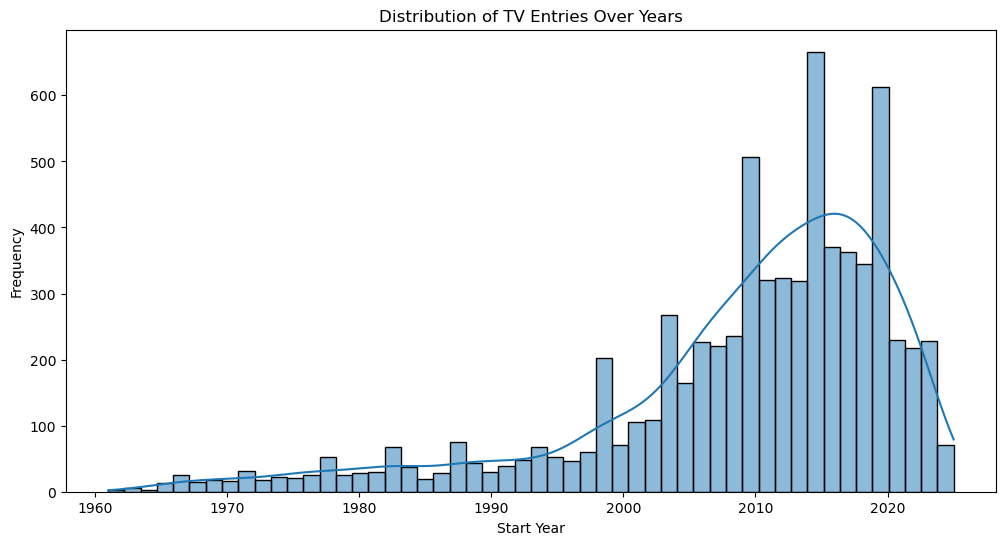

In [30]:
tv_entries = anime[anime['type'] == 'tv'].copy()

# Convert 'start_year' to numeric if it's not already
tv_entries['start_year'] = pd.to_numeric(tv_entries['start_year'], errors='coerce')

# Drop rows with missing values in 'start_year'
tv_entries = tv_entries.dropna(subset=['start_year'])

plt.figure(figsize=(12, 6))
sns.histplot(tv_entries['start_year'], kde=True)
plt.title('Distribution of TV Entries Over Years')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.show()


## Seeing the average score for TV series over the years

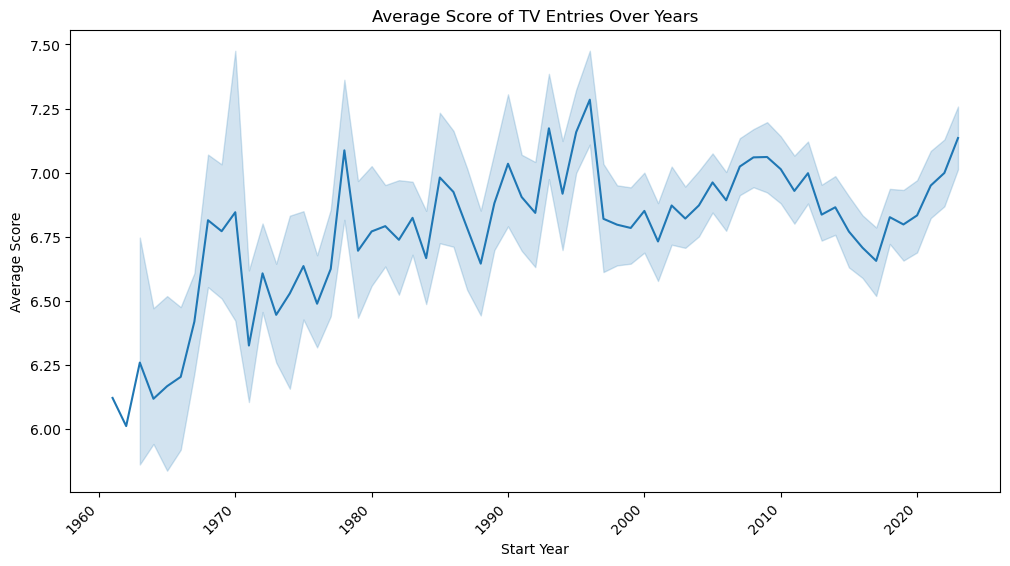

In [20]:
tv_entries = anime[anime['type'] == 'tv'].copy()

plt.figure(figsize=(12, 6))
sns.lineplot(x='start_year', y='score', data=tv_entries)
plt.title('Average Score of TV Entries Over Years')
plt.xlabel('Start Year')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


## Q 1-2 Grouping years by decades with .loc

In [32]:
#Apply flags
anime.loc[anime['start_year'] < 1960, 'Year group'] = '1917-1959'

In [33]:
anime.loc[(anime['start_year'] >= 1960) & (anime['start_year'] < 1970), 'Year group'] = '1960s'

In [34]:
anime.loc[(anime['start_year'] >= 1970) & (anime['start_year'] < 1980), 'Year group'] = '1970s'

In [35]:
anime.loc[(anime['start_year'] >= 1980) & (anime['start_year'] < 1990), 'Year group'] = '1980s'

In [36]:
anime.loc[(anime['start_year'] >= 1990) & (anime['start_year'] < 2000), 'Year group'] = '1990s'

In [37]:
anime.loc[(anime['start_year'] >= 2000) & (anime['start_year'] < 2010), 'Year group'] = '2000s'

In [38]:
anime.loc[(anime['start_year'] >= 2010) & (anime['start_year'] < 2020), 'Year group'] = '2010s'

In [39]:
anime.loc[anime['start_year'] >= 2020, 'Year group'] = '2020s'

In [40]:
anime['Year group'].value_counts()

Year group
2010s        10324
2000s         4795
2020s         3958
1990s         2389
1980s         1497
1970s          549
1917-1959      316
1960s          282
Name: count, dtype: int64

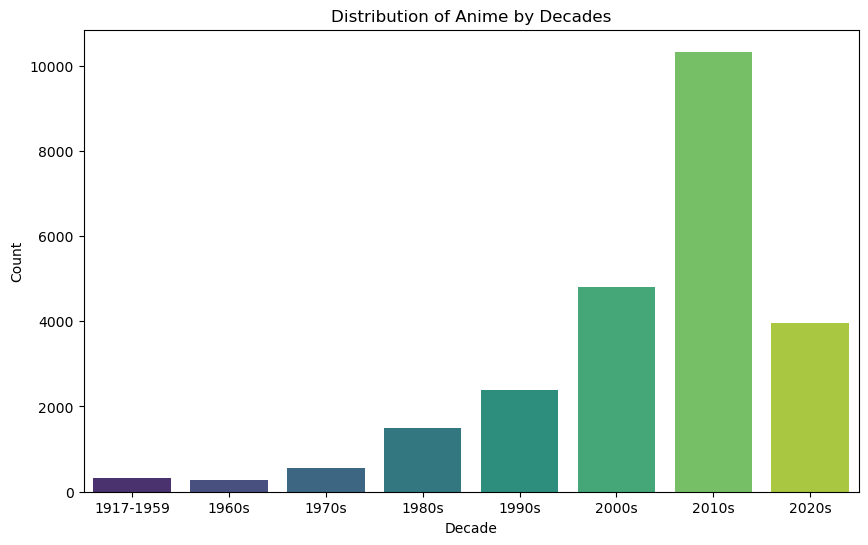

In [41]:
#Bar chart for .loc
anime['Year group'] = anime['Year group'].astype(str)

plt.figure(figsize=(10, 6))
decade_order = ['1917-1959', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

anime['Year group'] = pd.Categorical(anime['Year group'], categories=decade_order, ordered=True)
sns.countplot(x='Year group', data=anime, palette='viridis')
plt.title('Distribution of Anime by Decades')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()

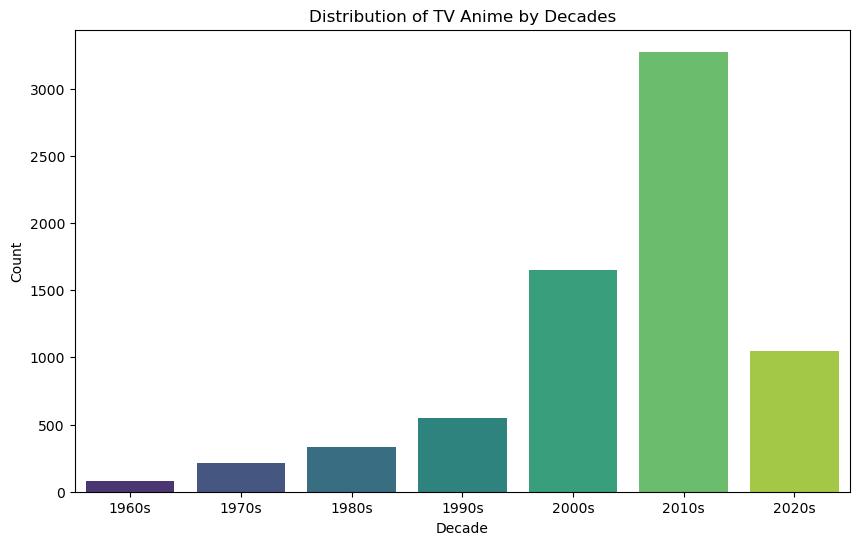

In [45]:
# Filter for TV entries
tv_entries = anime[anime['type'] == 'tv'].copy()

plt.figure(figsize=(10, 6))

# Define the chronological order of decades
decade_order = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']

tv_entries['Year group'] = pd.Categorical(tv_entries['Year group'], categories=decade_order, ordered=True)

sns.countplot(x='Year group', data=tv_entries, palette='viridis')

plt.title('Distribution of TV Anime by Decades')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()


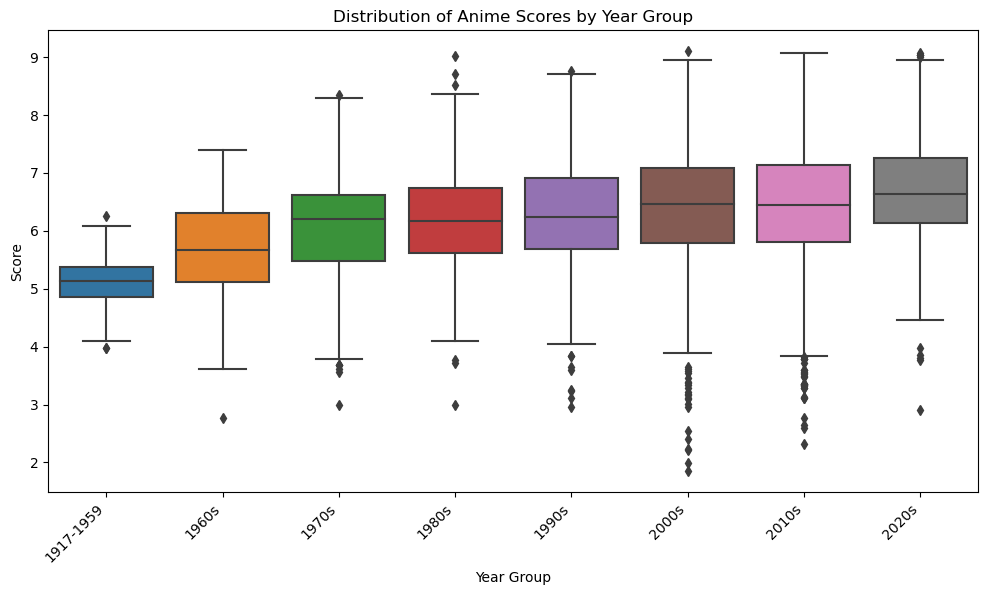

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year group', y='score', data=anime)
plt.title('Distribution of Anime Scores by Year Group')
plt.xlabel('Year Group')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [47]:
anime.groupby('Year group').agg({'members': ['mean', 'min', 'max', 'count', 'sum']})

members                                     
                    mean   min        max  count          sum
Year group                                                   
1917-1959     709.069620  46.0     8931.0    316     224066.0
1960s        1291.539007  26.0    20207.0    282     364214.0
1970s        3102.096539  49.0   128113.0    549    1703051.0
1980s        8198.806279  35.0  1185513.0   1497   12273613.0
1990s       14858.071997  24.0  2204897.0   2389   35495934.0
2000s       36425.611053  28.0  3747523.0   4795  174660805.0
2010s       53970.518307   0.0  3779820.0  10324  557191631.0
2020s       38949.716271  23.0  2304046.0   3958  154162977.0

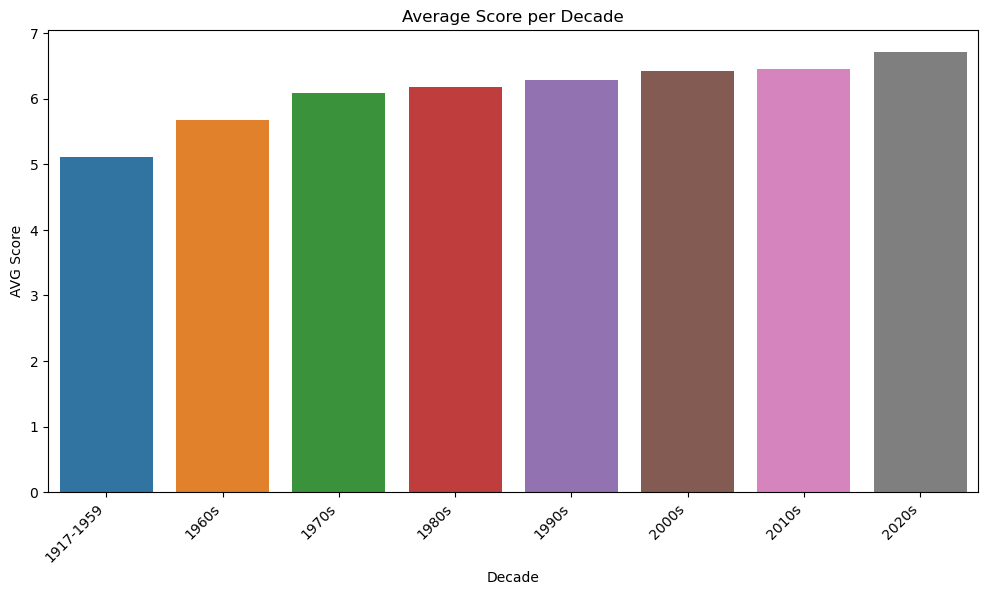

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year group', y='score', data=anime, errorbar=None)
plt.title('Average Score per Decade')
plt.xlabel('Decade')
plt.ylabel('AVG Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## Q 4-5 Popularity of sources (ie what inspired the anime)

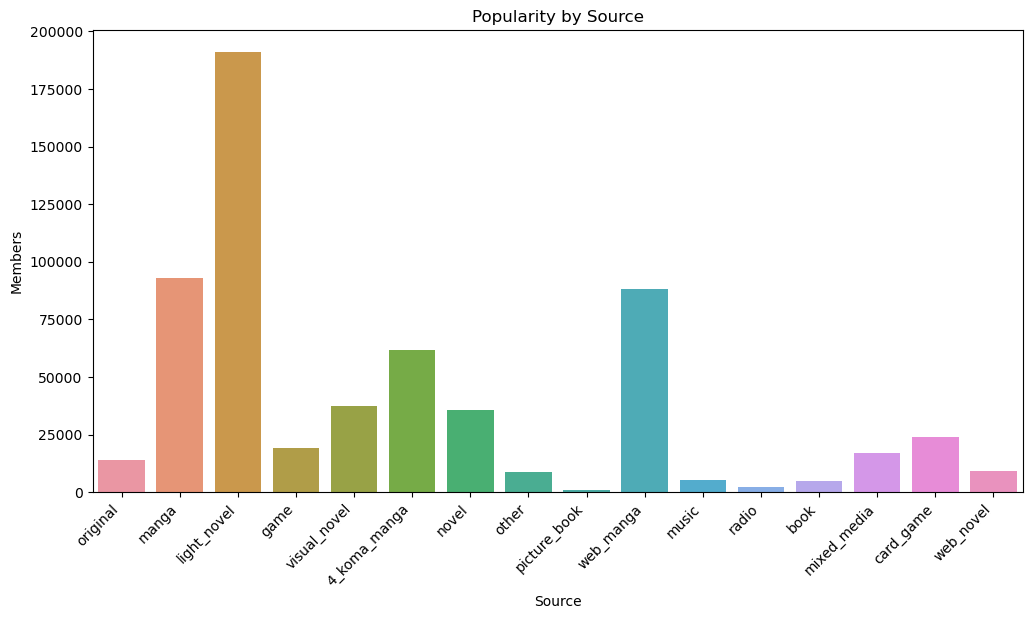

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x='source', y='members', data=anime, errorbar=None)
plt.title('Popularity by Source')
plt.xlabel('Source')
plt.ylabel('Members')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

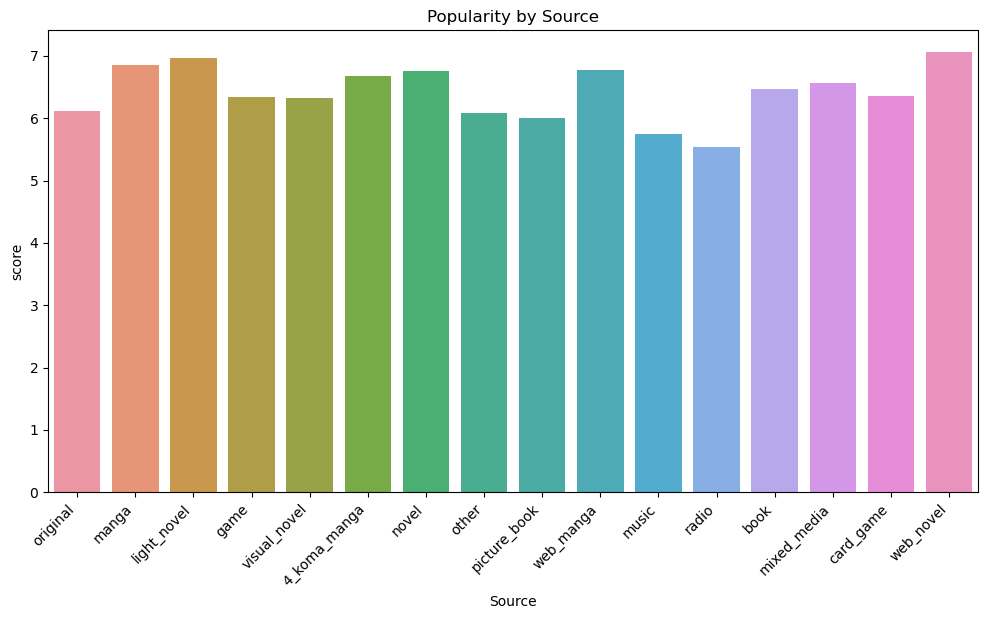

In [50]:
# Score average
plt.figure(figsize=(12, 6))
sns.barplot(x='source', y='score', data=anime, errorbar=None)
plt.title('Popularity by Source')
plt.xlabel('Source')
plt.ylabel('score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [23]:
anime['source'].value_counts()

source
original        9758
manga           4839
game            1231
other           1121
visual_novel    1113
light_novel      998
novel            741
web_manga        456
music            379
4_koma_manga     316
picture_book     275
book             201
mixed_media      197
card_game         84
web_novel         83
comic             17
radio             14
Name: count, dtype: int64

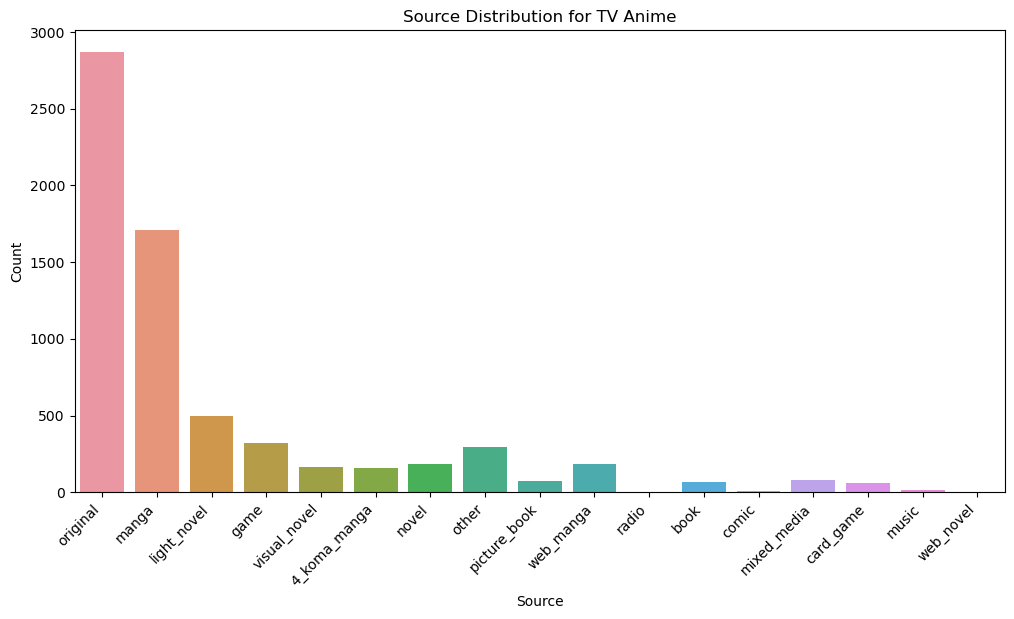

In [24]:
tv_anime = anime[anime['type'] == 'tv']

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='source', data=tv_anime)

plt.title('Source Distribution for TV Anime')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

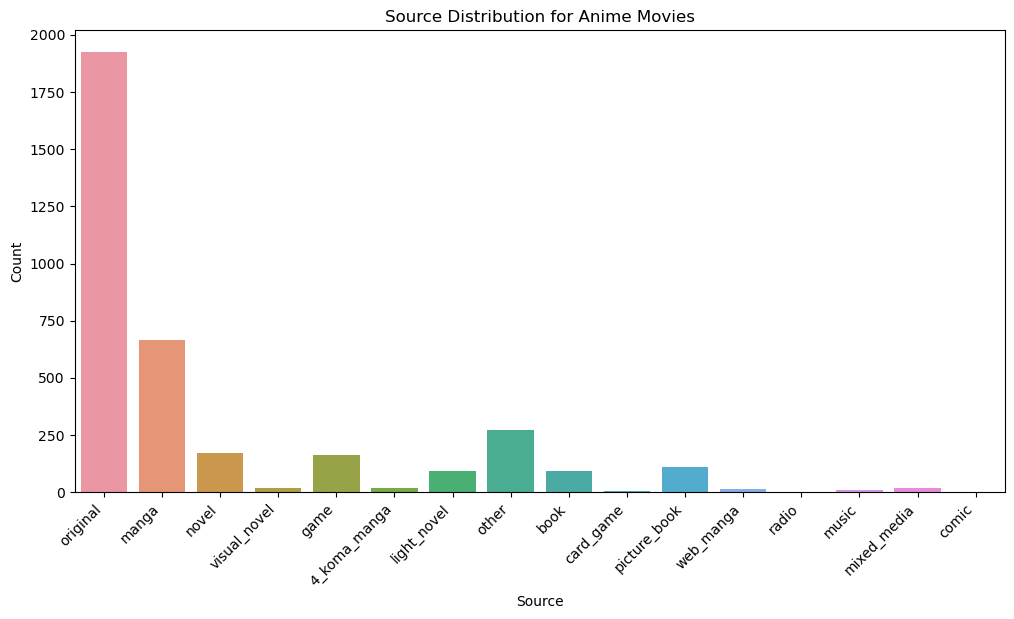

In [25]:
tv_anime = anime[anime['type'] == 'movie']

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='source', data=tv_anime)

plt.title('Source Distribution for Anime Movies')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Q3 Sorting by total members to judge popularity

In [26]:
#Apply flags
anime.loc[anime['members'] < 10000, 'popularity_level'] = 'Not popular'

In [27]:
anime.loc[(anime['members'] >= 10000) & (anime['members'] <= 24999), 'popularity_level'] = 'Not very popular'

In [28]:
anime.loc[(anime['members'] >= 25000) & (anime['members'] <= 99999), 'popularity_level'] = 'Somewhat popular'

In [29]:
anime.loc[(anime['members'] >=100000 ) & (anime['members'] <= 299999), 'popularity_level'] = 'Fairly popular'

In [30]:
anime.loc[anime['members'] >= 300000, 'popularity_level'] = 'Popular'

In [31]:
anime['popularity_level'].value_counts()

popularity_level
Not popular         18878
Somewhat popular     2239
Not very popular     1904
Fairly popular       1207
Popular               755
Name: count, dtype: int64

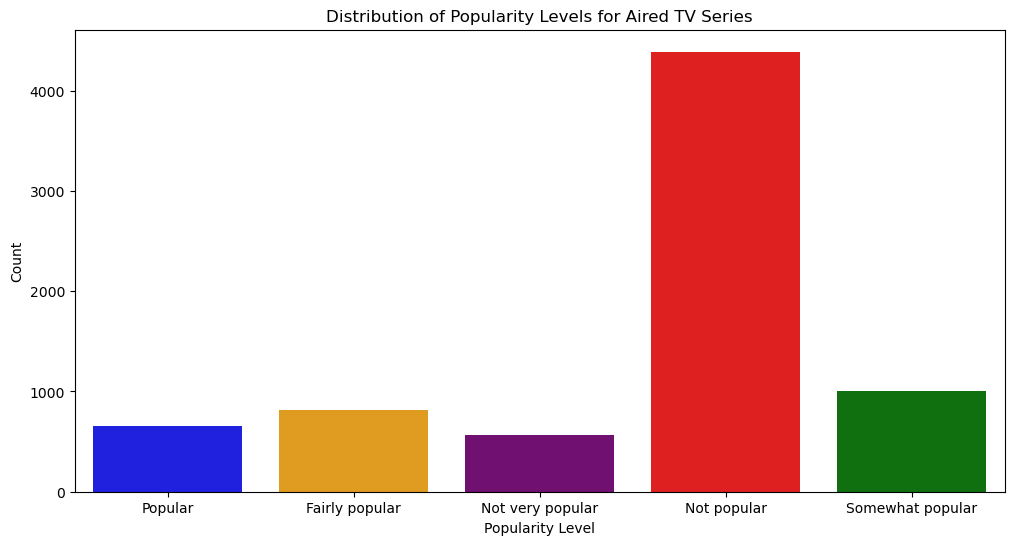

In [32]:
#Filtered for just TV series and anything that has completed airing or is currently airing
filtered_anime = anime[(anime['status'] != 'not_yet_aired') & (anime['type'] == 'tv')]

colors = ['Blue', 'Orange', 'Purple', 'Red', 'Green']

plt.figure(figsize=(12, 6))
sns.countplot(x='popularity_level', palette=colors, data=filtered_anime)
plt.title('Distribution of Popularity Levels for Aired TV Series')
plt.xlabel('Popularity Level')
plt.ylabel('Count')
plt.show()

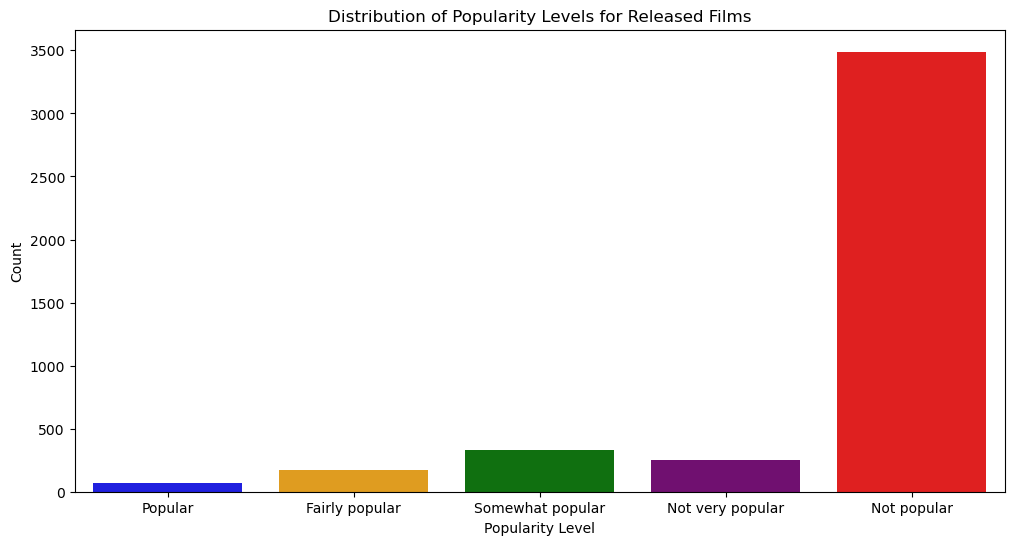

In [33]:
# Comparing only movies
filtered_anime = anime[(anime['status'] != 'not_yet_aired') & (anime['type'] == 'movie')]

colors = ['Blue', 'Orange', 'Green', 'Purple', 'Red']

plt.figure(figsize=(12, 6))
sns.countplot(x='popularity_level', palette=colors, data=filtered_anime)
plt.title('Distribution of Popularity Levels for Released Films')
plt.xlabel('Popularity Level')
plt.ylabel('Count')
plt.show()

## Series Length and Popularity

In [34]:
#Apply flags
anime.loc[anime['episodes'] <=13, 'series length'] = 'short length'

In [35]:
anime.loc[(anime['episodes'] >= 14) & (anime['episodes'] < 40), 'series length'] = 'medium length'

In [36]:
anime.loc[anime['episodes'] >=40, 'series length'] = 'long length'

In [37]:
anime['series length'].value_counts()

series length
short length     18862
medium length     3037
long length       2537
Name: count, dtype: int64

In [38]:
print(anime['series length'].dtype)


object


In [39]:
anime['length'] = anime['length'].astype('category')

KeyError: 'length'

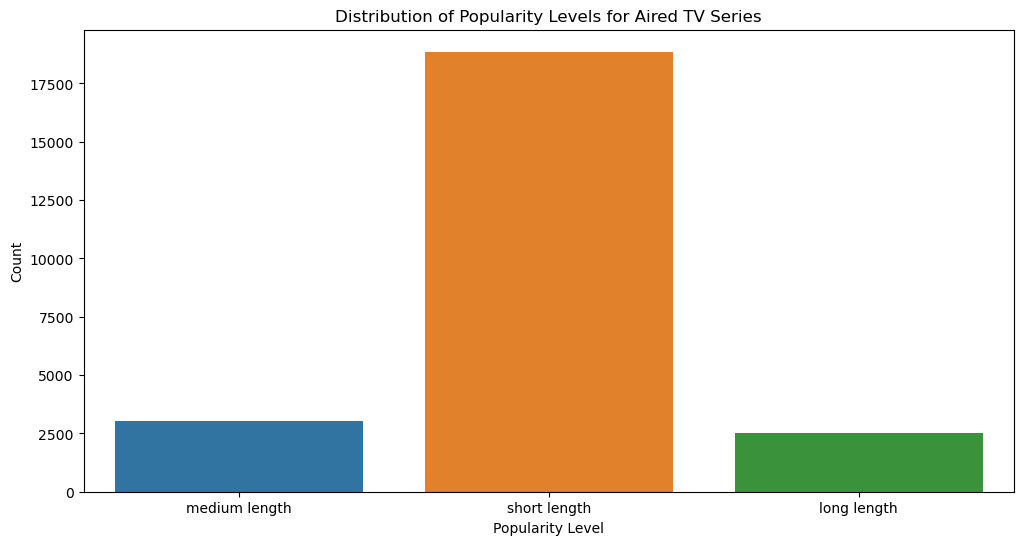

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(x='series length', data=anime)
plt.title('Distribution of Popularity Levels for Aired TV Series')
plt.xlabel('Popularity Level')
plt.ylabel('Count')
plt.show()

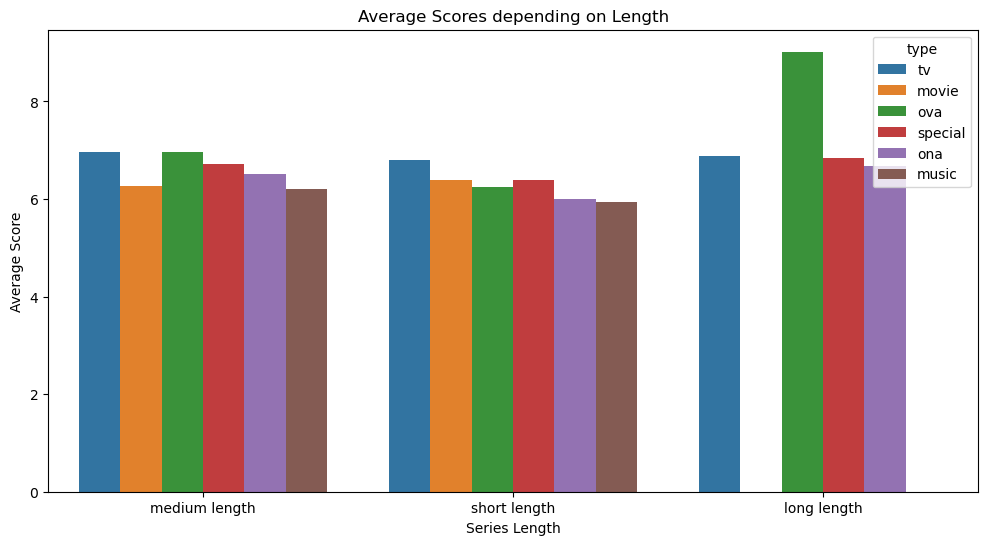

In [41]:
# Comparing score depending on Length

plt.figure(figsize=(12, 6))
sns.barplot(x='series length', y='score', hue='type', data=anime, errorbar=None)
plt.title('Average Scores depending on Length')
plt.xlabel('Series Length')
plt.ylabel('Average Score')
plt.show()


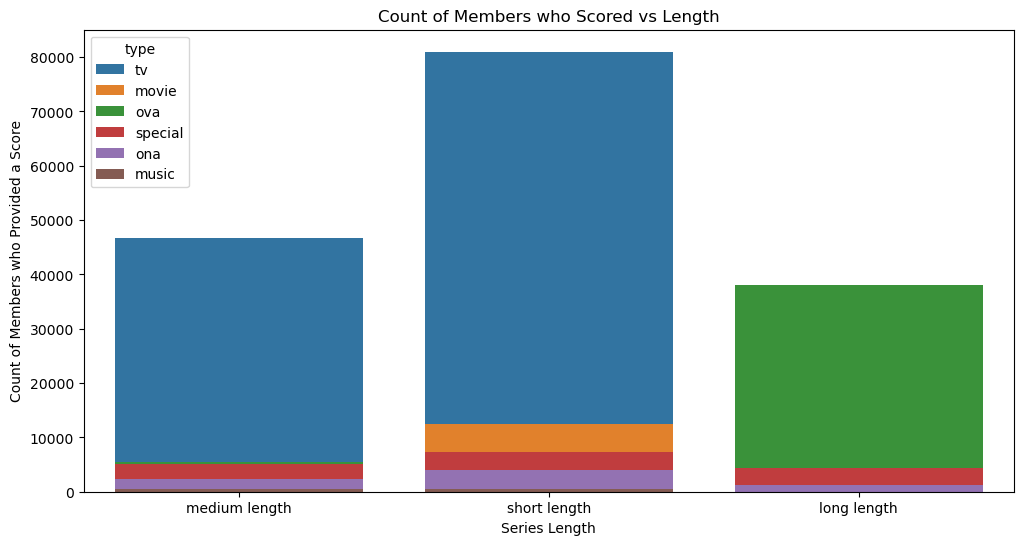

In [42]:
# Comparing score depending on Length

plt.figure(figsize=(12, 6))
sns.barplot(x='series length', y='scored_by', hue='type', data=anime, dodge= False, errorbar=None)
plt.title('Count of Members who Scored vs Length')
plt.xlabel('Series Length')
plt.ylabel('Count of Members who Provided a Score')
plt.show()


In [50]:
#Apply flags
anime.loc[anime['total_duration'] <=75, 'time length'] = 'short time'

In [51]:
anime.loc[(anime['total_duration'] >75) & (anime['episodes'] <100), 'time length'] = 'medium time'

In [52]:
anime.loc[anime['total_duration'] >=100, 'time length'] = 'long time'

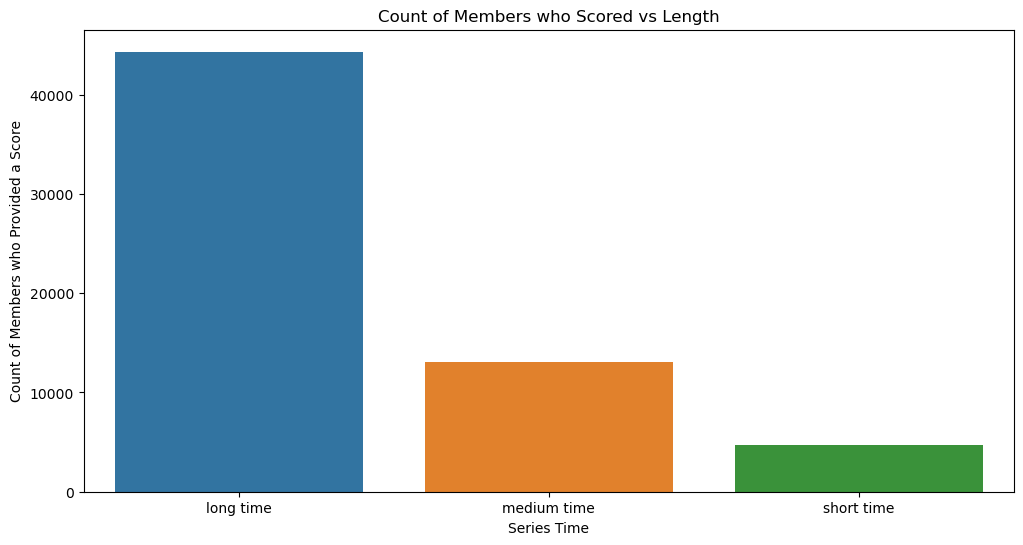

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x='time length', y='scored_by', data=anime, dodge= False, errorbar=None)
plt.title('Count of Members who Scored vs Length')
plt.xlabel('Series Time')
plt.ylabel('Count of Members who Provided a Score')
plt.show()

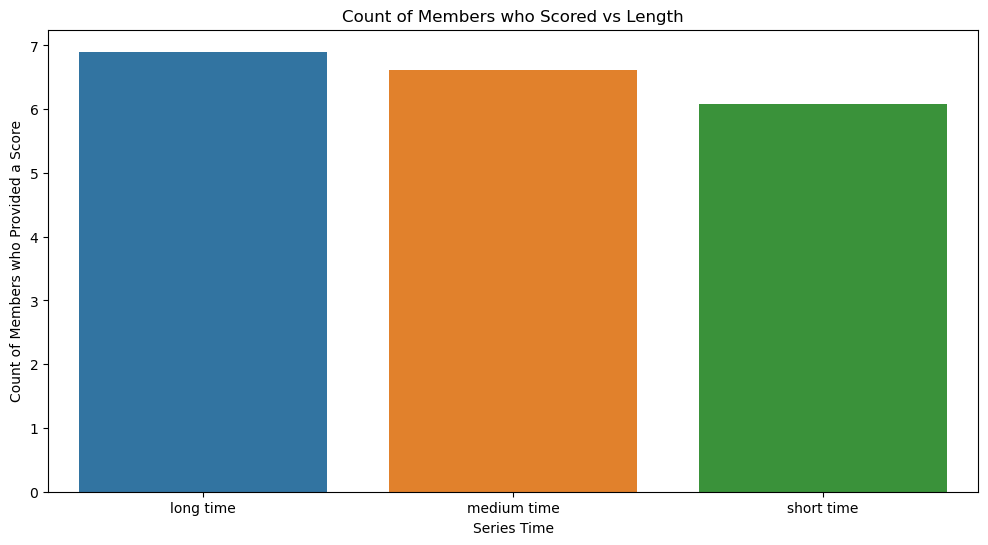

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x='time length', y='score', data=anime, dodge= False, errorbar=None)
plt.title('Count of Members who Scored vs Length')
plt.xlabel('Series Time')
plt.ylabel('Count of Members who Provided a Score')
plt.show()

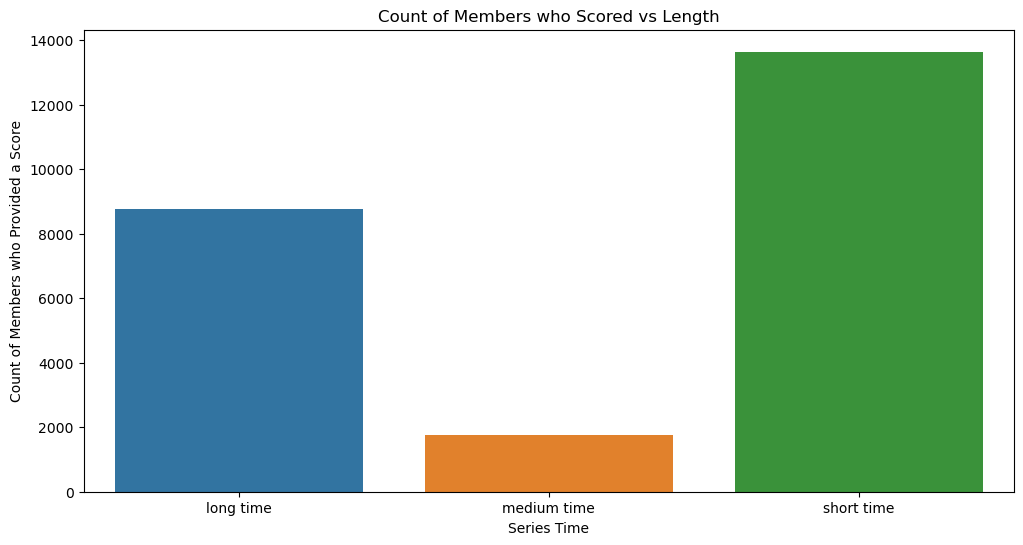

In [62]:
plt.figure(figsize=(12, 6))
sns.countplot(x='time length', data=anime)
plt.title('Count of Members who Scored vs Length')
plt.xlabel('Series Time')
plt.ylabel('Count of Members who Provided a Score')
plt.show()

# Key Questions (so far):

1) Comparing the 2010s versus the 2020s: there have already been nearly 1000 titles aired/announced in TV series alone for the decade.

2) This data set was last updated in August of 2023, so far there hasn't really been much difference in scoring or popularity but it does definitely look like it's been on a rise.

3) Shorter series are definitely more popular. Long series also aren't as accurate because there are a few series that are extremely long (ie, Sazae-san (nearly 8k), Detective Conan(1k+), and One Piece(1k+)) that do not have episode counts since they are ongoing.)

4) Original, surprisingly. I expected Manga or light novels.

5) Yes and no. Scores are close, they hover around 6/7 in scores, more users consume anime based on Light Novels.

6) Depending on the entry, roughly 33% to 75% of members actally provide a score.

### Hypothesis:
#### Something I'd love to test is regarding seasons. "Anime released in the fall season receive higher average scores compared to those in other seasons."